In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz

# Data preparation

## Source:

Source
1. C. Okan Sakar
Department of Computer Engineering, Faculty of
Engineering and Natural Sciences, Bahcesehir University,
34349 Besiktas, Istanbul, Turkey

2. Yomi Kastro
Inveon Information Technologies Consultancy and Trade,
34335 Istanbul, Turkey

## Data Set Information

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

## Attributes information

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration": represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 

"Bonuce Rate": The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

"Exit Rate": The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

"Page Value": The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

"Special Day": The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

"Month": Indicate which month the visit was done.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## Web Analytics Background

https://support.google.com/analytics/answer/2695658?hl=en#:~:text=Page%20Value%20is%20the%20average,more%20to%20your%20site's%20revenue.

https://support.google.com/analytics/answer/6205762?hl=en#zippy=%2Cin-this-article

## Goal of the dataset

The goal of this notebook is to be able to classify whether there are Revenue or not based on the other raw attributes.

The task is supervised learning specifically classification.

The notebook focuses on two algorithms: k-NN and decision tree.

## Data preprocess

In [2]:
# read csv file using pandas

df = pd.read_csv('online_shoppers_intention.csv')
df_saved = df.copy()

df.tail(15)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12315,0,0.00,0,0.0,7,212.500000,0.000000,0.033333,0.000000,0.0,Nov,3,2,1,11,Returning_Visitor,True,False
12316,0,0.00,0,0.0,44,615.000000,0.013636,0.036364,0.000000,0.0,Dec,4,1,3,1,Returning_Visitor,False,False
12317,3,100.50,0,0.0,95,1453.640882,0.002105,0.012761,0.000000,0.0,Dec,2,2,3,2,New_Visitor,False,False
12318,0,0.00,0,0.0,6,279.000000,0.000000,0.033333,0.000000,0.0,Dec,1,2,3,10,Returning_Visitor,True,False
12319,0,0.00,0,0.0,21,1128.583333,0.000000,0.013043,3.685401,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
12320,0,0.00,0,0.0,8,143.583333,0.014286,0.050000,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,False,False
12321,0,0.00,0,0.0,6,0.000000,0.200000,0.200000,0.000000,0.0,Nov,1,8,4,1,Returning_Visitor,False,False
12322,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.000000,0.0,Dec,2,2,4,2,Returning_Visitor,False,False
12323,2,64.75,0,0.0,44,1157.976190,0.000000,0.013953,0.000000,0.0,Nov,2,2,1,10,Returning_Visitor,False,False
12324,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False


In [3]:
df[df['Revenue']== True]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
65,3,87.833333,0,0.00,27,798.333333,0.000000,0.012644,22.916036,0.8,Feb,2,2,3,1,Returning_Visitor,False,True
76,10,1005.666667,0,0.00,36,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False,True
101,4,61.000000,0,0.00,19,607.000000,0.000000,0.026984,17.535959,1.0,Feb,1,1,7,4,Returning_Visitor,True,True
188,9,111.500000,1,48.50,49,1868.819697,0.000000,0.020709,1.706015,0.0,Mar,2,2,7,2,Returning_Visitor,False,True
196,2,56.000000,1,144.00,67,2563.783333,0.000000,0.005797,19.342650,0.0,Mar,2,2,4,2,New_Visitor,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,6,133.466667,0,0.00,44,2664.445833,0.002041,0.010884,97.860836,0.0,Nov,2,2,1,3,Returning_Visitor,True,True
12276,7,139.575000,0,0.00,30,986.500000,0.000000,0.011429,36.392861,0.0,Dec,2,10,1,2,New_Visitor,False,True
12311,1,0.000000,2,211.25,144,4627.489571,0.001361,0.020664,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
12312,7,150.357143,1,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,Nov,2,5,1,2,Returning_Visitor,True,True


In [4]:
df.shape

(12330, 18)

In [5]:
df.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
# Since Revenue is our class label, let us see how many are true and false
df['Revenue'].value_counts() # 84% of the sessions did not end up in a transaction

False    10422
True      1908
Name: Revenue, dtype: int64

### Administrative

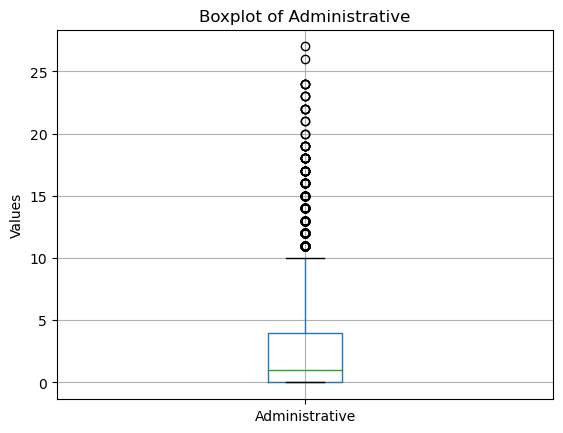

In [8]:
# let us check any outliers using boxplot for administrative attribute
df.boxplot(column=['Administrative'])
# adding title and labels
plt.title('Boxplot of Administrative')
plt.ylabel('Values')
plt.show()

In [9]:
# Finding outliers of Administrative using IQR
Q1 = df['Administrative'].quantile(0.25)
Q3 = df['Administrative'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['Administrative'] < lower_bound) | (df['Administrative'] > upper_bound)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
62,12,279.416667,0,0.000000,42,1553.583333,0.009000,0.019667,38.308493,0.0,Feb,1,1,3,2,Returning_Visitor,False,False
248,16,155.631313,0,0.000000,32,908.013456,0.005000,0.018053,4.368516,0.0,Mar,2,2,3,2,Returning_Visitor,False,True
282,13,1249.809524,4,205.000000,36,1626.625433,0.010638,0.026186,6.831792,0.0,Mar,3,2,2,3,Returning_Visitor,False,False
288,11,215.523809,1,70.000000,87,3037.499952,0.002151,0.007722,0.000000,0.0,Mar,2,2,5,1,Returning_Visitor,False,False
478,13,315.966667,1,0.000000,15,406.575000,0.019048,0.032381,0.000000,0.0,Mar,3,2,3,2,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12209,12,257.750000,0,0.000000,3,97.500000,0.000000,0.038462,0.000000,0.0,Dec,3,2,4,8,Returning_Visitor,False,True
12221,12,317.628205,2,256.500000,81,3675.940705,0.006742,0.017421,11.622885,0.0,Dec,2,2,1,10,Returning_Visitor,True,True
12233,13,399.750000,3,47.750000,61,1458.993056,0.001786,0.016552,17.497219,0.0,Nov,1,1,1,2,New_Visitor,False,False
12236,12,219.274359,4,857.166667,107,2640.135697,0.000000,0.015490,6.479206,0.0,Nov,1,2,1,2,Returning_Visitor,True,True


In [10]:
# let us see if the outliers effect y_train
df[(df['Administrative'] < lower_bound) | (df['Administrative'] > upper_bound)]['Revenue'].value_counts() # 0.72 of the outliers are false. Close to the overall false percentage. This means that outliers does not have effect on the class label

False    294
True     110
Name: Revenue, dtype: int64

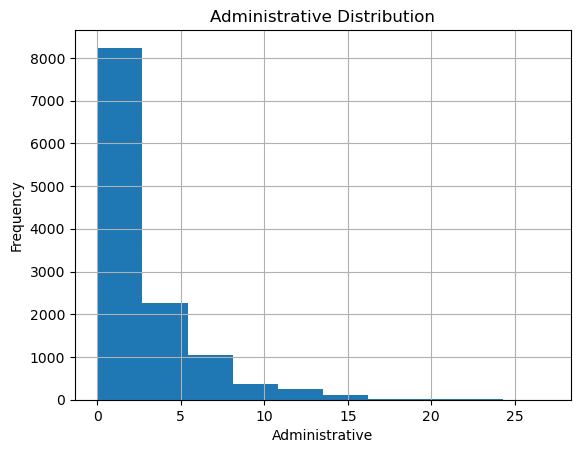

In [11]:
# let us see the distribution of the attribute
df['Administrative'].hist()
# adding title and labels
plt.title('Administrative Distribution')
plt.xlabel('Administrative')
plt.ylabel('Frequency')
plt.show() # it is right skewed. Therefore, i will replace with the median instead the mean.

In [12]:
# let us replace the outliers with the mean value and round it to the nearest integer
df['Administrative'] = df['Administrative'].apply(lambda x: round(df['Administrative'].median()) if (x < lower_bound) | (x > upper_bound) else x)

### Administrative_Duration

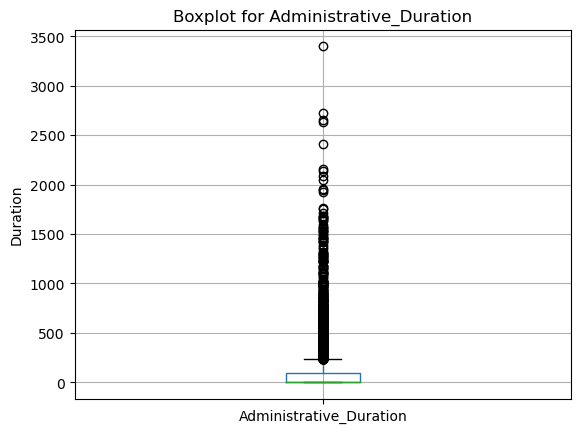

In [13]:
# let us check any outliers using boxplot for Administrative_Duration attribute
df.boxplot(column=['Administrative_Duration'])
# adding title and labels
plt.title('Boxplot for Administrative_Duration')
plt.ylabel('Duration')
plt.show()

In [14]:
# Finding outliers of Administrative using IQR
Q1 = df['Administrative_Duration'].quantile(0.25)
Q3 = df['Administrative_Duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['Administrative_Duration'] < lower_bound) | (df['Administrative_Duration'] > upper_bound)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
62,1,279.416667,0,0.00,42,1553.583333,0.009000,0.019667,38.308493,0.0,Feb,1,1,3,2,Returning_Visitor,False,False
76,10,1005.666667,0,0.00,36,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False,True
109,6,326.250000,4,94.00,128,5062.213753,0.000855,0.017918,0.000000,0.0,Feb,2,5,1,3,Returning_Visitor,False,False
128,4,462.000000,0,0.00,51,1873.216667,0.000000,0.007547,0.000000,0.6,Feb,2,2,9,3,Returning_Visitor,False,False
187,10,293.778205,2,153.00,96,3283.166739,0.001961,0.013509,0.000000,0.0,Mar,3,2,6,2,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12247,7,311.136111,0,0.00,36,1699.073611,0.010088,0.035614,133.281379,0.0,Dec,3,2,1,13,Returning_Visitor,False,False
12260,2,262.666667,3,112.00,127,4214.779822,0.008397,0.018035,0.000000,0.0,Nov,3,2,1,3,Returning_Visitor,False,False
12265,6,413.499612,0,0.00,83,6072.032391,0.007059,0.024024,1.240071,0.0,Nov,3,2,8,1,Returning_Visitor,True,True
12285,6,369.333333,2,225.50,133,3918.363736,0.000000,0.009275,7.147604,0.0,Nov,2,2,2,2,Returning_Visitor,False,False


In [15]:
# let us see if the outliers effect y_train
df[(df['Administrative_Duration'] < lower_bound) | (df['Administrative_Duration'] > upper_bound)]['Revenue'].value_counts() # 0.75 of the outliers are false. Close to the overall false percentage. This means that outliers does not have effect on the class label

False    882
True     290
Name: Revenue, dtype: int64

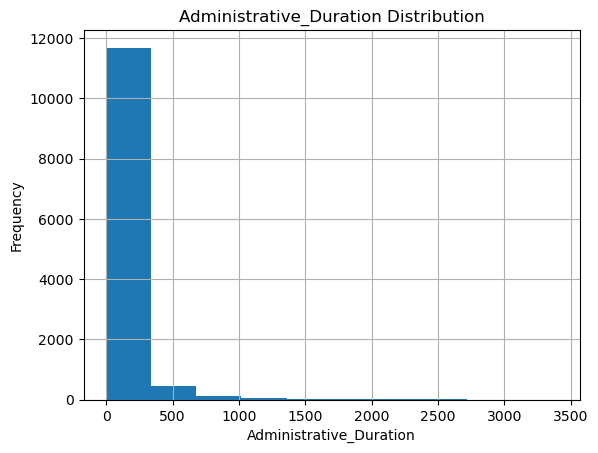

In [16]:
# let us see the distribution of the attribute to decide whether to replace with mean or median
df['Administrative_Duration'].hist()
# adding title and labels
plt.title('Administrative_Duration Distribution')
plt.xlabel('Administrative_Duration')
plt.ylabel('Frequency')

plt.show() # it is right skewed. Therefore, i will replace with the median instead the mean.

In [17]:
# let us replace them with the mean
df['Administrative_Duration'] = df['Administrative_Duration'].apply(lambda x: round(df['Administrative_Duration'].median()) if (x < lower_bound) | (x > upper_bound) else x)

### Informational

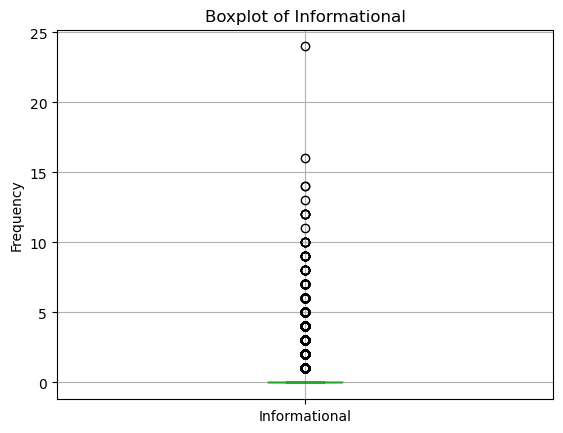

In [18]:
# let us check any outliers using boxplot for Administrative_Duration attribute
df.boxplot(column=['Informational'])
# adding title and labels
plt.title('Boxplot of Informational')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Finding outliers of Administrative using IQR
Q1 = df['Informational'].quantile(0.25)
Q3 = df['Informational'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['Informational'] < lower_bound) | (df['Informational'] > upper_bound)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
29,1,6.000000,1,0.00,45,1582.750000,0.043478,0.050821,54.179764,0.4,Feb,3,2,1,1,Returning_Visitor,False,False
57,4,56.000000,2,120.00,36,998.741667,0.000000,0.014736,19.447079,0.2,Feb,2,2,4,1,Returning_Visitor,False,False
98,0,0.000000,1,0.00,7,50.000000,0.038095,0.080952,0.000000,0.6,Feb,2,4,1,7,Returning_Visitor,False,False
103,2,31.000000,1,16.00,36,2083.530952,0.000000,0.013510,0.000000,0.8,Feb,2,2,4,3,Returning_Visitor,False,False
106,0,0.000000,1,0.00,9,215.000000,0.044444,0.074074,0.000000,0.8,Feb,4,1,1,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12307,2,8.000000,3,368.25,27,1121.250000,0.020000,0.042857,39.519807,0.0,Dec,3,2,1,2,Returning_Visitor,False,False
12311,1,0.000000,2,211.25,144,4627.489571,0.001361,0.020664,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
12312,7,150.357143,1,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,Nov,2,5,1,2,Returning_Visitor,True,True
12313,3,16.000000,3,86.00,15,2773.500000,0.000000,0.030000,78.811725,0.0,Dec,2,2,1,2,Returning_Visitor,False,True


In [20]:
# let us see if the outliers effect y_train
df[(df['Informational'] < lower_bound) | (df['Informational'] > upper_bound)]['Revenue'].value_counts() # 0.77 of the outliers are false. Close to the overall false percentage. This means that outliers does not have effect on the class label

False    2018
True      613
Name: Revenue, dtype: int64

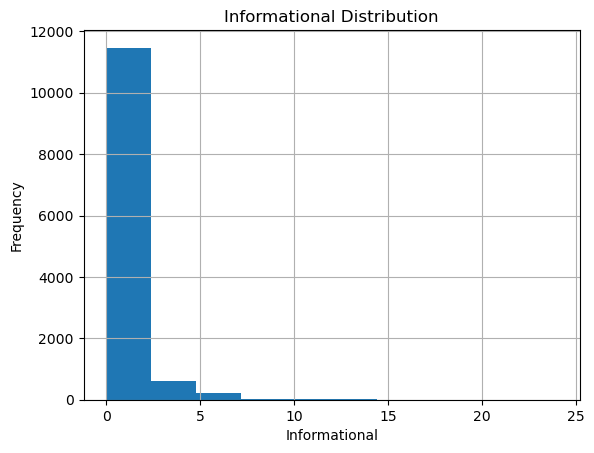

In [21]:
# let us see the distribution of the attribute to decide whether to replace with mean or median
df['Informational'].hist()
# adding title and labels
plt.title('Informational Distribution')
plt.xlabel('Informational')
plt.ylabel('Frequency')
plt.show() # it is right skewed. Therefore, i will replace with the median instead the mean.


In [22]:
# let us replace them with the mean
df['Informational'] = df['Informational'].apply(lambda x: round(df['Informational'].median()) if (x < lower_bound) | (x > upper_bound) else x)

### Informational_Duration

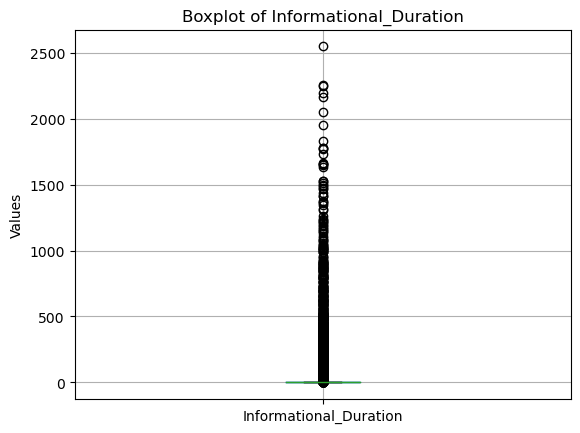

In [23]:
# let us check any outliers using boxplot for Administrative_Duration attribute
df.boxplot(column=['Informational_Duration'])
# adding title and labels
plt.title("Boxplot of Informational_Duration")
plt.ylabel("Values")
plt.show()

In [24]:
# Finding outliers of Informational_Duration using IQR
Q1 = df['Informational_Duration'].quantile(0.25)
Q3 = df['Informational_Duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['Informational_Duration'] < lower_bound) | (df['Informational_Duration'] > upper_bound)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
57,4,56.000000,0,120.00,36,998.741667,0.000000,0.014736,19.447079,0.2,Feb,2,2,4,1,Returning_Visitor,False,False
103,2,31.000000,0,16.00,36,2083.530952,0.000000,0.013510,0.000000,0.8,Feb,2,2,4,3,Returning_Visitor,False,False
109,6,8.000000,0,94.00,128,5062.213753,0.000855,0.017918,0.000000,0.0,Feb,2,5,1,3,Returning_Visitor,False,False
114,0,0.000000,0,93.00,30,1045.833333,0.012903,0.035484,0.000000,0.2,Feb,1,1,1,3,Returning_Visitor,False,False
122,0,0.000000,0,75.00,14,442.333333,0.000000,0.034375,0.000000,0.8,Feb,1,1,3,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12295,0,0.000000,0,33.75,9,313.928571,0.033333,0.027778,0.000000,0.0,Dec,3,2,2,10,Returning_Visitor,False,False
12307,2,8.000000,0,368.25,27,1121.250000,0.020000,0.042857,39.519807,0.0,Dec,3,2,1,2,Returning_Visitor,False,False
12311,1,0.000000,0,211.25,144,4627.489571,0.001361,0.020664,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
12312,7,150.357143,0,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,Nov,2,5,1,2,Returning_Visitor,True,True


In [25]:
# let us see if the outliers effect y_train
df[(df['Informational_Duration'] < lower_bound) | (df['Informational_Duration'] > upper_bound)]['Revenue'].value_counts() # 0.77 of the outliers are false. Close to the overall false percentage. This means that outliers does not have effect on the class label

False    1840
True      565
Name: Revenue, dtype: int64

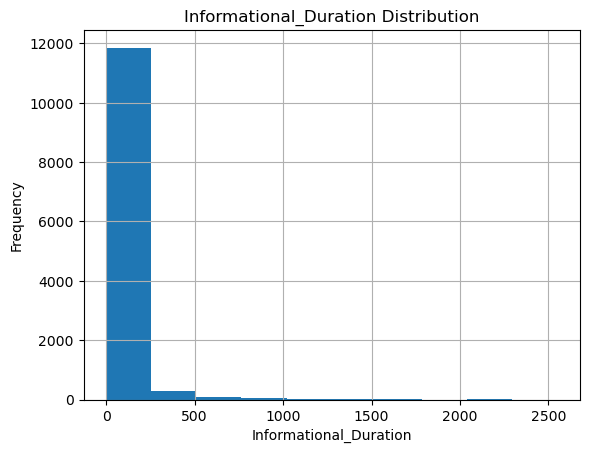

In [26]:
# let us see the distribution of the attribute to decide whether to replace with mean or median
df['Informational_Duration'].hist()
# adding title and labels
plt.title('Informational_Duration Distribution')
plt.xlabel('Informational_Duration')
plt.ylabel('Frequency')
plt.show() # it is right skewed. Therefore, i will replace with the median instead the mean.

In [27]:
# let us replace them with the median
df['Informational_Duration'] = df['Informational_Duration'].apply(lambda x: round(df['Informational_Duration'].median()) if (x < lower_bound) | (x > upper_bound) else x)

### ProductRelated

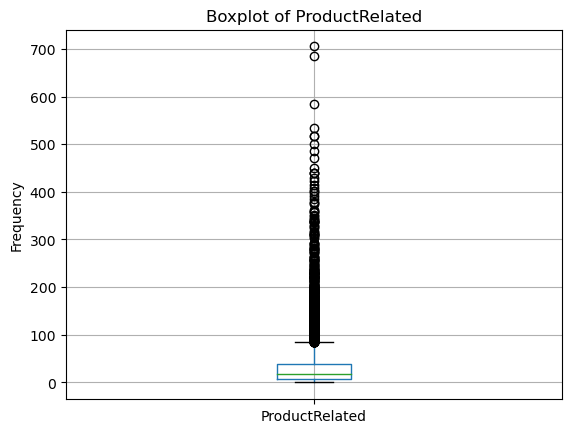

In [28]:
# let us check any outliers using boxplot for Administrative_Duration attribute
df.boxplot(column=['ProductRelated'])
# adding title and labels
plt.title("Boxplot of ProductRelated")
plt.ylabel("Frequency")
plt.show()

In [29]:
# Finding outliers of Informational_Duration using IQR
Q1 = df['ProductRelated'].quantile(0.25)
Q3 = df['ProductRelated'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['ProductRelated'] < lower_bound) | (df['ProductRelated'] > upper_bound)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
66,4,44.000000,0,0.0,90,6951.972222,0.002151,0.015013,0.000000,0.0,Feb,4,1,1,3,Returning_Visitor,False,False
109,6,8.000000,0,0.0,128,5062.213753,0.000855,0.017918,0.000000,0.0,Feb,2,5,1,3,Returning_Visitor,False,False
187,10,8.000000,0,0.0,96,3283.166739,0.001961,0.013509,0.000000,0.0,Mar,3,2,6,2,Returning_Visitor,True,False
195,0,0.000000,0,0.0,98,3556.612410,0.002062,0.010173,0.000000,0.0,Mar,1,1,1,3,Returning_Visitor,False,False
288,1,215.523809,0,0.0,87,3037.499952,0.002151,0.007722,0.000000,0.0,Mar,2,2,5,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12285,6,8.000000,0,0.0,133,3918.363736,0.000000,0.009275,7.147604,0.0,Nov,2,2,2,2,Returning_Visitor,False,False
12287,8,167.910714,0,0.0,111,6340.152381,0.003361,0.009432,44.219794,0.0,Dec,3,2,6,2,Returning_Visitor,False,False
12311,1,0.000000,0,0.0,144,4627.489571,0.001361,0.020664,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
12312,7,150.357143,0,0.0,221,11431.001240,0.011149,0.021904,1.582473,0.0,Nov,2,5,1,2,Returning_Visitor,True,True


In [30]:
# let us see if the outliers effect y_train
df[(df['ProductRelated'] < lower_bound) | (df['ProductRelated'] > upper_bound)]['Revenue'].value_counts() # 0.71 of the outliers are false. Close to the overall false percentage. This means that outliers does not have effect on the class label

False    702
True     285
Name: Revenue, dtype: int64

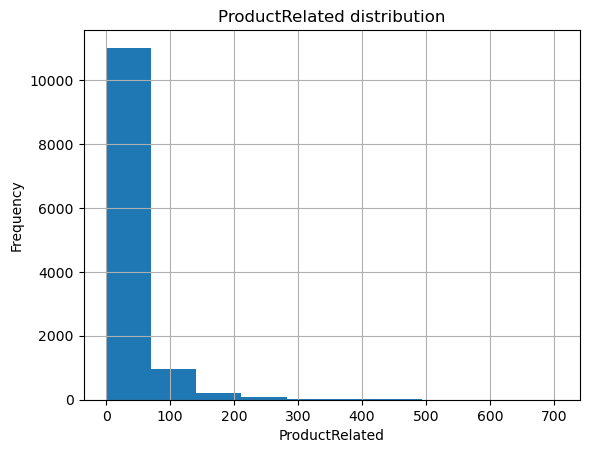

In [31]:
# let us see the distribution of the attribute to decide whether to replace with mean or median
df['ProductRelated'].hist()
# adding title and labels
plt.title('ProductRelated distribution')
plt.xlabel('ProductRelated')
plt.ylabel('Frequency')
plt.show() # it is right skewed. Therefore, i will replace with the median instead the mean.

In [32]:
# let us replace them with the median
df['ProductRelated'] = df['ProductRelated'].apply(lambda x: round(df['ProductRelated'].median()) if (x < lower_bound) | (x > upper_bound) else x)

### ProductRelated_Duration	

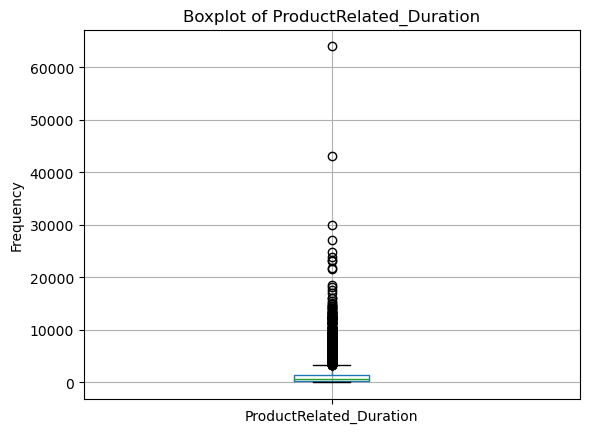

In [33]:
# let us check any outliers using boxplot for Administrative_Duration attribute
df.boxplot(column=['ProductRelated_Duration'])
# adding title and labels
plt.title("Boxplot of ProductRelated_Duration")
plt.ylabel("Frequency")

plt.show()

In [34]:
# Finding outliers of Informational_Duration using IQR
Q1 = df['ProductRelated_Duration'].quantile(0.25)
Q3 = df['ProductRelated_Duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['ProductRelated_Duration'] < lower_bound) | (df['ProductRelated_Duration'] > upper_bound)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
40,1,9.000000,0,0.0,46,4084.393939,0.000000,0.001795,0.000000,0.0,Feb,2,2,8,4,Returning_Visitor,False,False
66,4,44.000000,0,0.0,18,6951.972222,0.002151,0.015013,0.000000,0.0,Feb,4,1,1,3,Returning_Visitor,False,False
109,6,8.000000,0,0.0,18,5062.213753,0.000855,0.017918,0.000000,0.0,Feb,2,5,1,3,Returning_Visitor,False,False
195,0,0.000000,0,0.0,18,3556.612410,0.002062,0.010173,0.000000,0.0,Mar,1,1,1,3,Returning_Visitor,False,False
251,0,0.000000,0,0.0,18,5188.500000,0.000000,0.050000,0.000000,0.0,Mar,2,5,1,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12285,6,8.000000,0,0.0,18,3918.363736,0.000000,0.009275,7.147604,0.0,Nov,2,2,2,2,Returning_Visitor,False,False
12287,8,167.910714,0,0.0,18,6340.152381,0.003361,0.009432,44.219794,0.0,Dec,3,2,6,2,Returning_Visitor,False,False
12308,1,19.000000,0,0.0,45,4018.450000,0.009091,0.021970,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,True,False
12311,1,0.000000,0,0.0,18,4627.489571,0.001361,0.020664,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,True


In [35]:
# let us see if the outliers effect y_train
df[(df['ProductRelated_Duration'] < lower_bound) | (df['ProductRelated_Duration'] > upper_bound)]['Revenue'].value_counts() # 0.70 of the outliers are false. Close to the overall false percentage. This means that outliers does not have effect on the class label

False    672
True     289
Name: Revenue, dtype: int64

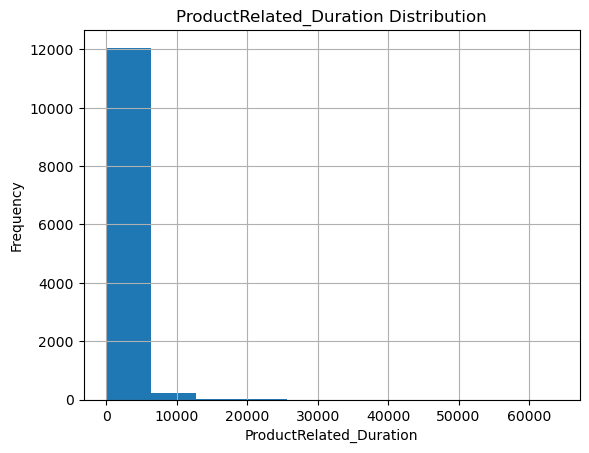

In [36]:
# let us see the distribution of the attribute to decide whether to replace with mean or median
df['ProductRelated_Duration'].hist()
# adding title and labels
plt.title('ProductRelated_Duration Distribution')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('Frequency')
plt.show() # it is right skewed. Therefore, i will replace with the median instead the mean.

In [37]:
# let us replace them with the median
df['ProductRelated_Duration'] = df['ProductRelated_Duration'].apply(lambda x: round(df['ProductRelated_Duration'].median()) if (x < lower_bound) | (x > upper_bound) else x)

### BounceRates

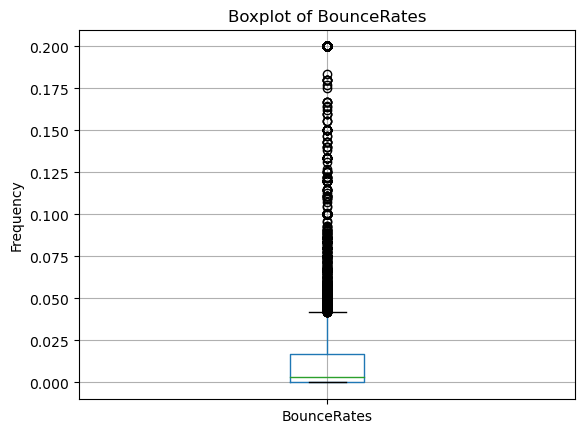

In [38]:
# let us check any outliers using boxplot for Administrative_Duration attribute
df.boxplot(column=['BounceRates'])
# adding title and labels
plt.title("Boxplot of BounceRates")
plt.ylabel("Frequency")
plt.show()

In [39]:
# Finding outliers of Informational_Duration using IQR
Q1 = df['BounceRates'].quantile(0.25)
Q3 = df['BounceRates'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['BounceRates'] < lower_bound) | (df['BounceRates'] > upper_bound)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12290,0,0.0,0,0.0,20,1008.500000,0.080000,0.120000,0.0,0.0,Dec,2,2,3,1,Returning_Visitor,True,False
12292,0,0.0,0,0.0,8,189.500000,0.075000,0.100000,0.0,0.0,Dec,3,2,1,13,Returning_Visitor,False,False
12301,0,0.0,0,0.0,2,0.000000,0.200000,0.200000,0.0,0.0,Nov,1,1,4,1,Returning_Visitor,False,False
12321,0,0.0,0,0.0,6,0.000000,0.200000,0.200000,0.0,0.0,Nov,1,8,4,1,Returning_Visitor,False,False


In [40]:
# let us see if the outliers effect y_train
df[(df['BounceRates'] < lower_bound) | (df['BounceRates'] > upper_bound)]['Revenue'].value_counts() # 0.98 of the outliers are false! This means that its possible that outliers have effect on the class label. Those 25 True values could possibly effect the class label significantly. I will not replace the outliers.

False    1526
True       25
Name: Revenue, dtype: int64

### ExitRates

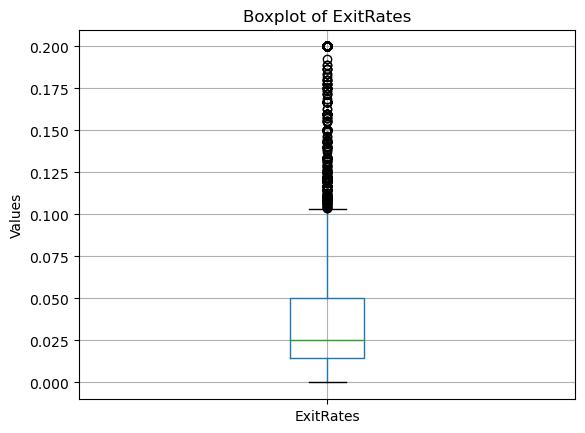

In [41]:
# let us check any outliers using boxplot for Administrative_Duration attribute
df.boxplot(column=['ExitRates'])
# adding title
plt.title("Boxplot of ExitRates")
plt.ylabel("Values")
plt.show()

In [42]:
# Finding outliers of Informational_Duration using IQR
Q1 = df['ExitRates'].quantile(0.25)
Q3 = df['ExitRates'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['ExitRates'] < lower_bound) | (df['ExitRates'] > upper_bound)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12220,0,0.0,0,0.0,2,0.000000,0.200000,0.200000,0.0,0.0,Nov,2,5,1,2,Returning_Visitor,False,False
12248,0,0.0,0,0.0,7,1749.000000,0.047619,0.104762,0.0,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
12290,0,0.0,0,0.0,20,1008.500000,0.080000,0.120000,0.0,0.0,Dec,2,2,3,1,Returning_Visitor,True,False
12301,0,0.0,0,0.0,2,0.000000,0.200000,0.200000,0.0,0.0,Nov,1,1,4,1,Returning_Visitor,False,False


In [43]:
# let us see if the outliers effect y_train
df[(df['ExitRates'] < lower_bound) | (df['ExitRates'] > upper_bound)]['Revenue'].value_counts() # 0.99 of the outliers are false! This means that its possible that outliers have effect on the class label. Those 6 True values could possibly effect the class label significantly. I will not replace the outliers.

False    1093
True        6
Name: Revenue, dtype: int64

### PageValues

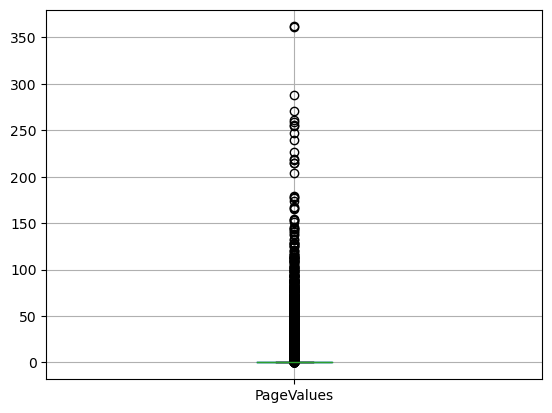

In [44]:
# let us check any outliers using boxplot for Administrative_Duration attribute
df.boxplot(column=['PageValues'])
plt.show()

In [45]:
# Finding outliers of Informational_Duration using IQR
Q1 = df['PageValues'].quantile(0.25)
Q3 = df['PageValues'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['PageValues'] < lower_bound) | (df['PageValues'] > upper_bound)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
29,1,6.000000,0,0.0,45,1582.750000,0.043478,0.050821,54.179764,0.4,Feb,3,2,1,1,Returning_Visitor,False,False
57,4,56.000000,0,0.0,36,998.741667,0.000000,0.014736,19.447079,0.2,Feb,2,2,4,1,Returning_Visitor,False,False
62,1,8.000000,0,0.0,42,1553.583333,0.009000,0.019667,38.308493,0.0,Feb,1,1,3,2,Returning_Visitor,False,False
65,3,87.833333,0,0.0,27,798.333333,0.000000,0.012644,22.916036,0.8,Feb,2,2,3,1,Returning_Visitor,False,True
76,10,8.000000,0,0.0,36,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12307,2,8.000000,0,0.0,27,1121.250000,0.020000,0.042857,39.519807,0.0,Dec,3,2,1,2,Returning_Visitor,False,False
12312,7,150.357143,0,0.0,18,599.000000,0.011149,0.021904,1.582473,0.0,Nov,2,5,1,2,Returning_Visitor,True,True
12313,3,16.000000,0,0.0,15,2773.500000,0.000000,0.030000,78.811725,0.0,Dec,2,2,1,2,Returning_Visitor,False,True
12319,0,0.000000,0,0.0,21,1128.583333,0.000000,0.013043,3.685401,0.0,Dec,2,2,1,2,Returning_Visitor,False,False


In [46]:
# let us see if the outliers effect y_train
df[(df['PageValues'] < lower_bound) | (df['PageValues'] > upper_bound)]['Revenue'].value_counts() # 0.56 of the outliers are True. This means that outliers could potentioally have positive effect on the class label.

True     1538
False    1192
Name: Revenue, dtype: int64

### SpecialDay

In [47]:
df['SpecialDay'].value_counts() 

# Attribute is ordial. The attribute does not have outliers nor need to be encoded.

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

### Month

In [48]:
df['Month'].value_counts()

# There are no typo or entry errors

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

### OperatingSystems

In [49]:
df['OperatingSystems'].value_counts() 

# Attribute is nominal. The attribute does not have outliers nor need to be encoded.

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

### Browser

In [50]:
df['Browser'].value_counts() 

# Attribute is nominal. The attribute does not have outliers nor need to be encoded.

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

### Region

In [51]:
df['Region'].value_counts() 

# Attribute is nominal. The attribute does not have outliers nor need to be encoded.

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

### TrafficType

In [52]:
df['TrafficType'].value_counts() 

# Attribute is nominal. The attribute does not have outliers nor need to be encoded.

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

### VisitorType

In [53]:
df['VisitorType'].value_counts() 

# Attribute is nominal. The attribute does not have outliers nor need to be encoded.

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

### Weekend

In [54]:
df['Weekend'].value_counts() 

# Attribute is nominal. The attribute does not have outliers nor need to be encoded.

False    9462
True     2868
Name: Weekend, dtype: int64

### Encoding

In [55]:
encoding_list =  ['Month', 'VisitorType', 'Weekend']

one_hot_encoding_list = []
label_encoding_list = []

for i in range (0, len(encoding_list)):
    if(len(df[f'{encoding_list[i]}'].unique()) == 2):
        label_encoding_list.append(encoding_list[i])
    else:
        one_hot_encoding_list.append(encoding_list[i])
    print(f'Unique Values for {encoding_list[i]}', df[f'{encoding_list[i]}'].unique())

Unique Values for Month ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
Unique Values for VisitorType ['Returning_Visitor' 'New_Visitor' 'Other']
Unique Values for Weekend [False  True]


In [56]:
# Perform one-hot encoding on the categorical columns
categorical_columns = ['Month', 'VisitorType', 'Weekend']
encoded_data = pd.get_dummies(df, columns=categorical_columns)

encoded_df = pd.DataFrame(encoded_data)

print(encoded_df.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Revenue',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True'],
      dtype='object')


# Data Exploration

## Administrative

In [57]:
# summary statistics for administrative
print(encoded_df['Administrative'].describe())

count    12330.000000
mean         1.903893
std          2.553303
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Administrative, dtype: float64


In [58]:
# value counts
encoded_df['Administrative'].value_counts()


0     5768
1     1758
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
Name: Administrative, dtype: int64

In [59]:
# let us find the median of those instances that resulted in true values
encoded_df[encoded_df['Revenue'] == True]['Administrative'].median()

2.0

In [60]:
# let us find the median of those instances that resulted in false values
encoded_df[encoded_df['Revenue'] == False]['Administrative'].median()

0.0

In [61]:
# let us see now how many trues are from the administrative attribute
encoded_df[encoded_df['Revenue'] == True]['Administrative'].value_counts()

0     514
1     401
2     205
3     174
4     153
5     118
6     111
8      73
7      66
9      61
10     32
Name: Administrative, dtype: int64

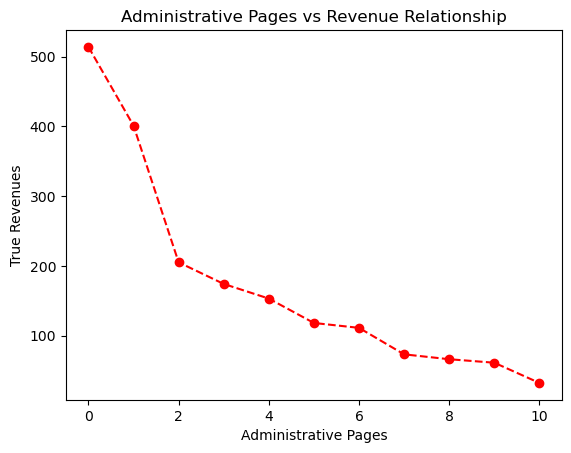

In [62]:
plt.plot(np.sort(encoded_df['Administrative'].unique()), encoded_df[encoded_df['Revenue'] == True]['Administrative'].value_counts(),marker='o', linestyle='--', color='r')
plt.title('Administrative Pages vs Revenue Relationship')
plt.xlabel('Administrative Pages')
plt.ylabel('True Revenues')
plt.show()

# as Administrative pages increases, as True Revenue values decreases

## Administrative_Duration

In [63]:
# summary statistics for administrative duration
print(encoded_df['Administrative_Duration'].describe())

count    12330.000000
mean        35.572548
std         55.681653
min          0.000000
25%          0.000000
50%          7.500000
75%         54.759091
max        233.083333
Name: Administrative_Duration, dtype: float64


In [64]:
encoded_df['Administrative_Duration'].median()

7.5

In [65]:
# median; true
encoded_df[encoded_df['Revenue'] == True]['Administrative_Duration'].median()

17.722727275

In [66]:
# median; false
encoded_df[encoded_df['Revenue'] == False]['Administrative_Duration'].median()

0.0

In [67]:
# True revenue counts
encoded_df[encoded_df['Revenue'] == True]['Administrative_Duration'].value_counts()

0.000000      548
8.000000      296
4.000000       11
9.000000       11
15.000000      10
             ... 
21.200000       1
42.400000       1
99.800000       1
84.500000       1
150.357143      1
Name: Administrative_Duration, Length: 751, dtype: int64

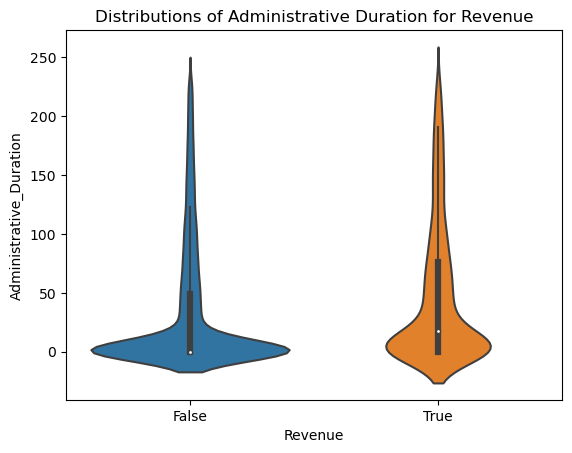

In [68]:
# let us plot a violin plot to see the distribution of Administrative_Duration for the target variable
sns.violinplot(x=encoded_df['Revenue'], y=encoded_df['Administrative_Duration'])
# adding title
plt.title("Distributions of Administrative Duration for Revenue")
plt.show()

# We can see a little bit differences in shapes. The median of True values is 21. The quartiles are longer in True.

## Informational

In [69]:
# summary statistics for informational
print(encoded_df['Informational'].describe())

count    12330.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Informational, dtype: float64


In [70]:
# does 0 Informational pages have more false or true?
encoded_df[encoded_df['Revenue'] == True]['Informational'].value_counts()

0    1908
Name: Informational, dtype: int64

In [71]:
encoded_df[encoded_df['Revenue'] == False]['Informational'].value_counts()

0    10422
Name: Informational, dtype: int64

## Informational_Duration

In [72]:
# summary statistics for informational
print(encoded_df['Informational_Duration'].describe())

count    12330.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Informational_Duration, dtype: float64


In [73]:
# does 0 Informational pages duration have more false or true?
encoded_df[encoded_df['Revenue'] == True]['Informational_Duration'].value_counts()

0.0    1908
Name: Informational_Duration, dtype: int64

In [74]:
# does 0 Informational pages have more false or true?
encoded_df[encoded_df['Revenue'] == False]['Informational_Duration'].value_counts()

0.0    10422
Name: Informational_Duration, dtype: int64

## ProductRelated

In [75]:
# summary statistics for ProductRelated
print(encoded_df['ProductRelated'].describe())

count    12330.000000
mean        21.372993
std         18.521644
min          0.000000
25%          7.000000
50%         18.000000
75%         29.000000
max         84.000000
Name: ProductRelated, dtype: float64


In [76]:
# median; true
encoded_df[encoded_df['Revenue'] == True]['ProductRelated'].median()

20.0

In [77]:
# median; false
encoded_df[encoded_df['Revenue'] == False]['ProductRelated'].median()

16.0

In [78]:
# let us see the values of ProductRelated that have most true values of target variable on encoded_df
encoded_df[encoded_df['Revenue'] == True]['ProductRelated'].value_counts()

18    314
10     50
13     45
22     44
14     43
     ... 
65      4
68      4
76      4
72      4
78      1
Name: ProductRelated, Length: 85, dtype: int64

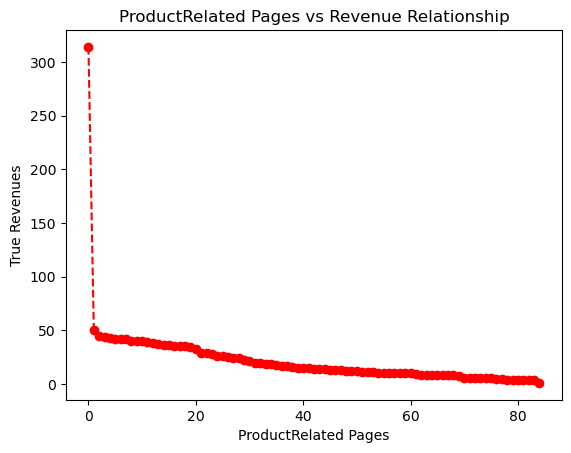

In [79]:
plt.plot(np.sort(encoded_df['ProductRelated'].unique()), encoded_df[encoded_df['Revenue'] == True]['ProductRelated'].value_counts(),marker='o', linestyle='--', color='r')
plt.title('ProductRelated Pages vs Revenue Relationship')
plt.xlabel('ProductRelated Pages')
plt.ylabel('True Revenues')
plt.show()

## ProductRelated_Duration

In [80]:
# summary statistics for ProductRelated_Duration
print(encoded_df['ProductRelated_Duration'].describe())

count    12330.000000
mean       772.614041
std        764.980417
min          0.000000
25%        184.137500
50%        598.936905
75%       1109.195833
max       3382.287999
Name: ProductRelated_Duration, dtype: float64


In [81]:
encoded_df['ProductRelated_Duration'].median()

598.9369047499999

In [82]:
# median; true
encoded_df[encoded_df['Revenue'] == True]['ProductRelated_Duration'].median()

742.1047619000001

In [83]:
# median; false
encoded_df[encoded_df['Revenue'] == False]['ProductRelated_Duration'].median()

510.19

In [84]:
counts = encoded_df[encoded_df['Revenue'] == True]['ProductRelated_Duration'].value_counts()

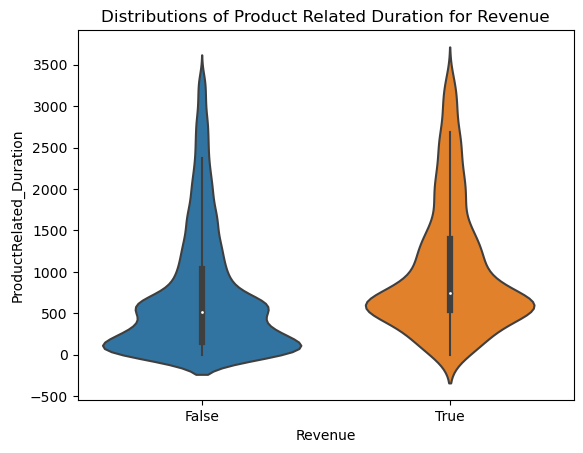

In [85]:
# let us plot a violin plot to see the distribution of Administrative_Duration for the target variable
sns.violinplot(x=encoded_df['Revenue'], y=encoded_df['ProductRelated_Duration'])
# adding title
plt.title("Distributions of Product Related Duration for Revenue")
plt.show()

# There's no relationship for the number of pages, but the duration seems to have an effect. 

## BounceRates

In [86]:
# summary statistics for ProductRelated_Duration
print(encoded_df['BounceRates'].describe())

count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
25%          0.000000
50%          0.003112
75%          0.016813
max          0.200000
Name: BounceRates, dtype: float64


In [87]:
encoded_df['BounceRates'].value_counts()

0.000000    5518
0.200000     700
0.066667     134
0.028571     115
0.050000     113
            ... 
0.079279       1
0.006723       1
0.013527       1
0.074419       1
0.011149       1
Name: BounceRates, Length: 1872, dtype: int64

In [88]:
# median; true
encoded_df[encoded_df['Revenue'] == True]['BounceRates'].median()

0.0

In [89]:
# median; false
encoded_df[encoded_df['Revenue'] == False]['BounceRates'].median()

0.004255319

In [90]:
# let us find how many true values of 0 BouneRates. This is important because as BounceRate decreases, this mean that the user are exploring further additional pages.
encoded_df[encoded_df['Revenue'] == True]['BounceRates'].value_counts()

0.000000    1036
0.014286      14
0.008333      12
0.006667      11
0.016667      10
            ... 
0.008844       1
0.005634       1
0.110714       1
0.005046       1
0.011149       1
Name: BounceRates, Length: 536, dtype: int64

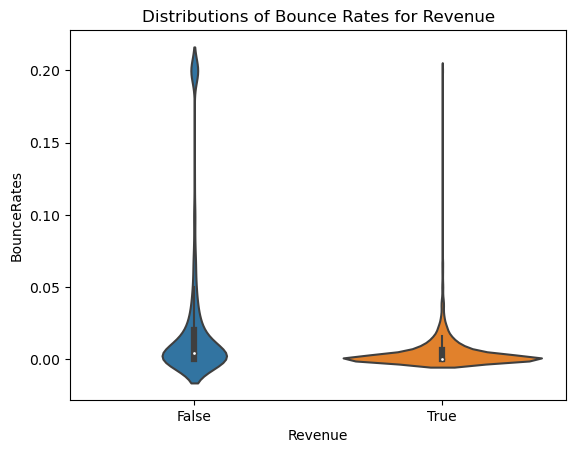

In [91]:
# let us plot a violin plot to see the distribution of Administrative_Duration for the target variable
sns.violinplot(x=encoded_df['Revenue'], y=encoded_df['BounceRates'])
# adding title
plt.title("Distributions of Bounce Rates for Revenue")
plt.show()

# We can see that 50% of the data in False lies in a longer range than True values. This is expected and it indicate that an increase of BounceRates could mean that the user didn't find the pages interesting and so no purchases occured.

## ExitRates

In [92]:
# summary statistics for BounceRates
print(encoded_df['ExitRates'].describe())

count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
25%          0.014286
50%          0.025156
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64


In [93]:
# median; true
encoded_df[encoded_df['Revenue'] == True]['ExitRates'].median()

0.016

In [94]:
# median; false
encoded_df[encoded_df['Revenue'] == False]['ExitRates'].median()

0.028571429

In [95]:
# We expect an increase in the number of Revenues as the ExitRates increases. This is because as the ExitRates increases, this could mean that the user is interested and is exploring additional pages.
counts = encoded_df[encoded_df['Revenue'] == True]['ExitRates'].value_counts()

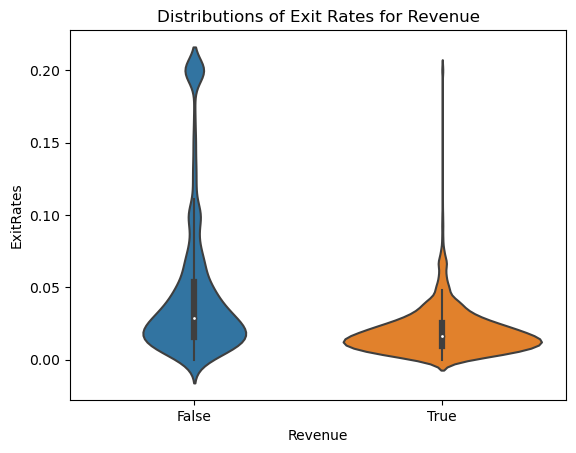

In [96]:
# let us plot a violin plot to see the distribution of Administrative_Duration for the target variable
sns.violinplot(x=encoded_df['Revenue'], y=encoded_df['ExitRates'])
# adding title
plt.title("Distributions of Exit Rates for Revenue")
plt.show()

## PageValues

In [97]:
# Summary statistics
encoded_df['PageValues'].describe()

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

In [98]:
# median; true
encoded_df[encoded_df['Revenue'] == True]['PageValues'].median()

16.758133555

In [99]:
# median; false
encoded_df[encoded_df['Revenue'] == False]['PageValues'].median()

0.0

In [100]:
encoded_df['PageValues'].value_counts()

0.000000     9600
53.988000       6
42.293068       3
59.988000       2
16.158558       2
             ... 
6.673696        1
6.094324        1
28.253955       1
16.090650       1
12.241717       1
Name: PageValues, Length: 2704, dtype: int64

In [101]:
# how many true values of revenue are from these?
encoded_df[encoded_df['Revenue'] == True]['PageValues'].value_counts()

0.000000     370
53.988000      5
54.980000      2
59.988000      2
34.039975      2
            ... 
44.561143      1
8.926824       1
25.484000      1
28.162750      1
78.811725      1
Name: PageValues, Length: 1518, dtype: int64

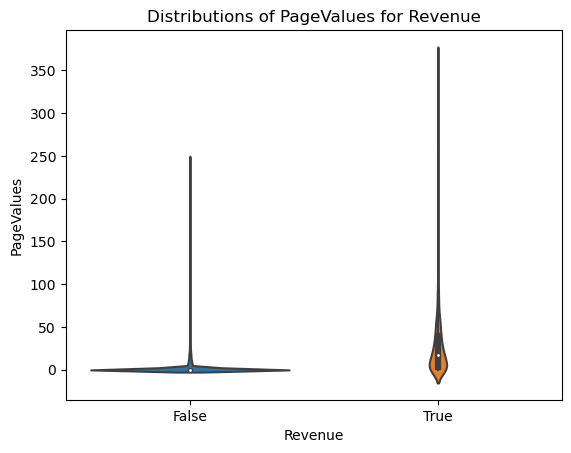

In [102]:
sns.violinplot(x=encoded_df['Revenue'], y=encoded_df['PageValues'])
# adding title
plt.title("Distributions of PageValues for Revenue")
plt.show()

# As expected, a higher PageValue in general indicate a higher chance of revenue generation. Where we can see 0 value for PageValues have more False.

## SpecialDay

In [103]:
# summary stats
encoded_df['SpecialDay'].describe()

count    12330.000000
mean         0.061427
std          0.198917
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64

In [104]:
# median; true
encoded_df[encoded_df['Revenue'] == True]['SpecialDay'].median()

0.0

In [105]:
# median; false
encoded_df[encoded_df['Revenue'] == False]['SpecialDay'].median()

0.0

In [106]:
encoded_df[encoded_df['Revenue'] == True]['SpecialDay'].value_counts()
# This is expected. Most values are normal purchases and not on a special day. If the value is too close to a special day, then the chance of making a purchase decrease. Therefore, the middle value has the most (0.6) after 0.


0.0    1831
0.6      29
0.2      14
0.4      13
0.8      11
1.0      10
Name: SpecialDay, dtype: int64

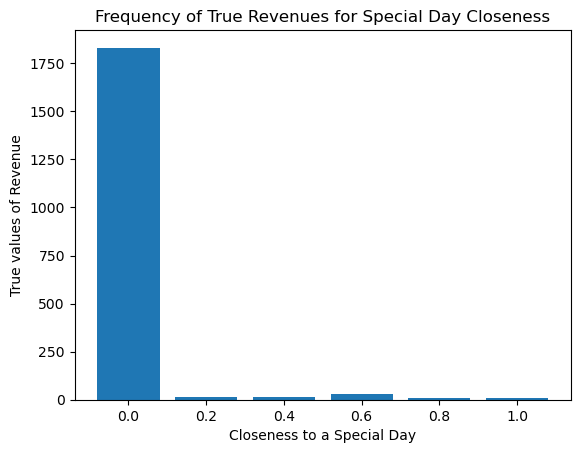

In [107]:
data1 = pd.Series([1831, 14, 13, 29, 11, 10], index=['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
plt.bar(data1.index, data1)
plt.xlabel('Closeness to a Special Day')
plt.ylabel('True values of Revenue')
plt.title('Frequency of True Revenues for Special Day Closeness')
plt.show()

## Month

In [108]:
df[df['Revenue'] == True]['Month'].value_counts()

Nov     760
May     365
Dec     216
Mar     192
Oct     115
Sep      86
Aug      76
Jul      66
June     29
Feb       3
Name: Month, dtype: int64

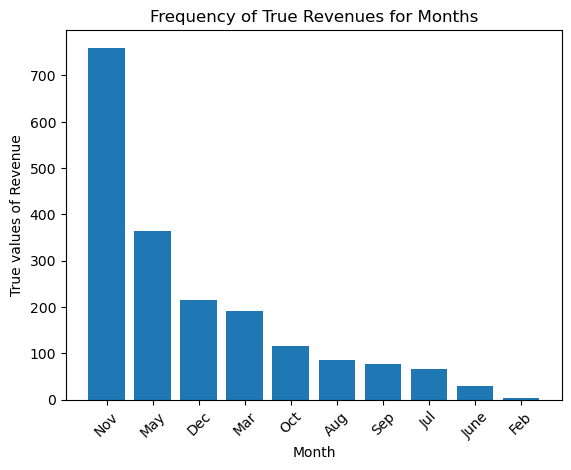

In [109]:
data2 = pd.Series([760, 365, 216, 192, 115, 86, 76, 66, 29, 3],
                 index=['Nov', 'May', 'Dec', 'Mar', 'Oct', 'Aug', 'Sep', 'Jul', 'June', 'Feb'])

plt.bar(data2.index, data2)
plt.xlabel('Month')
plt.ylabel('True values of Revenue')
plt.title('Frequency of True Revenues for Months')
plt.xticks(rotation=45)
plt.show()


## OperatingSystems

In [110]:
df[df['Revenue'] == True]['OperatingSystems'].value_counts()

2    1155
1     379
3     268
4      85
8      17
6       2
7       1
5       1
Name: OperatingSystems, dtype: int64

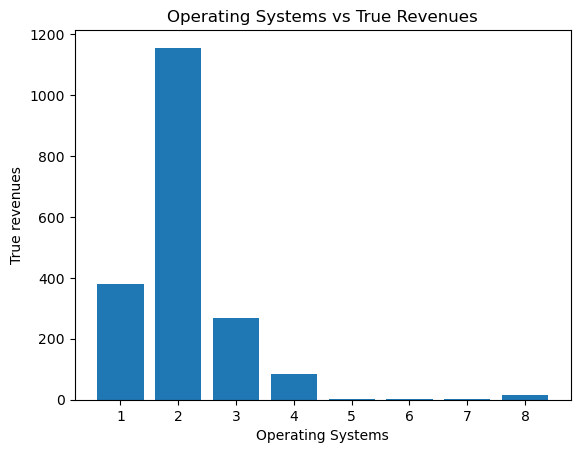

In [111]:
# Whatever operating system is 2, it has the most revenue. I wonder if they are apple users.. probably yes :3.
data3 = pd.Series([1155, 379, 268, 85, 17, 2, 1, 1],
                 index=[2, 1, 3, 4, 8, 6, 5, 7])

# Sort the data by index
data_sorted3 = data3.sort_index()

# Plot the bar graph
plt.bar(data_sorted3.index, data_sorted3)
plt.xlabel('Operating Systems')
plt.ylabel('True revenues')
plt.title('Operating Systems vs True Revenues')
plt.show()


## Browser

In [112]:
# I expect most broweser are google chrome so for sure there would be one very high value and the rest are small.
df[df['Revenue'] == True]['Browser'].value_counts()

2     1223
1      365
4      130
5       86
10      32
8       21
6       20
13      16
7        6
3        5
12       3
11       1
Name: Browser, dtype: int64

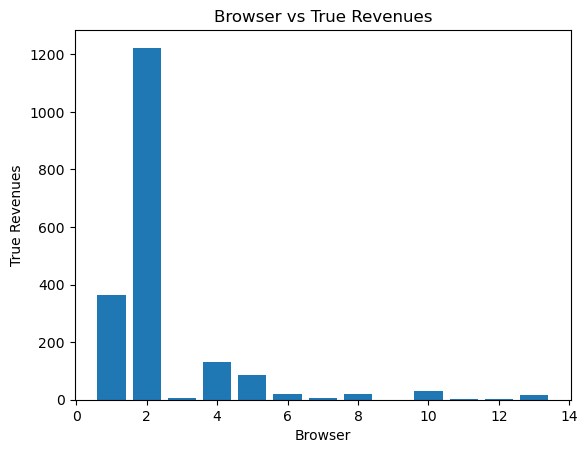

In [113]:
data4 = pd.Series([1223, 365, 130, 86, 32, 21, 20, 16, 6, 5, 3, 1],
                 index=[2, 1, 4, 5, 10, 8, 6, 13, 7, 3, 12, 11])

# Sort the data by index
data_sorted4 = data4.sort_index()

# Plot the bar graph
plt.bar(data_sorted4.index, data_sorted4)
plt.xlabel('Browser')
plt.ylabel('True Revenues')
plt.title('Browser vs True Revenues')
plt.show()


## Region

In [114]:
df[df['Revenue'] == True]['Region'].value_counts()

1    771
3    349
2    188
4    175
7    119
6    112
9     86
8     56
5     52
Name: Region, dtype: int64

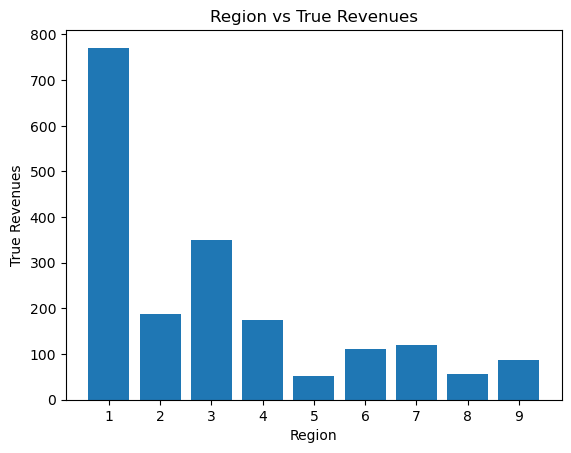

In [115]:
data5 = pd.Series([771, 349, 188, 175, 119, 112, 86, 56, 52],
                 index=[1, 3, 2, 4, 7, 6, 9, 8, 5])

# Sort the data by index
data_sorted5 = data5.sort_index()

# Plot the bar graph
plt.bar(data_sorted5.index.astype(str), data_sorted5)
plt.xlabel('Region')
plt.ylabel('True Revenues')
plt.title('Region vs True Revenues')
plt.show()

## TrafficType

In [116]:
df[df['Revenue'] == True]['TrafficType'].value_counts()

2     847
1     262
3     180
4     165
8      95
10     90
5      56
6      53
20     50
11     47
13     43
7      12
9       4
14      2
19      1
16      1
Name: TrafficType, dtype: int64

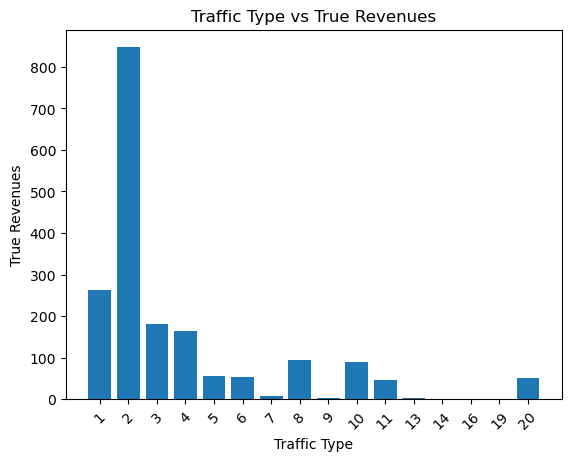

In [117]:
data6 = pd.Series([847, 262, 180, 165, 95, 90, 56, 53, 50, 47, 4, 7, 2, 1, 1, 1],
                 index=[2, 1, 3, 4, 8, 10, 5, 6, 20, 11, 13, 7, 9, 14, 19, 16])

# Sort the data by index
data_sorted6 = data6.sort_index()

# Plot the bar graph
plt.bar(data_sorted6.index.astype(str), data_sorted6)
plt.xlabel('Traffic Type')
plt.ylabel('True Revenues')
plt.title('Traffic Type vs True Revenues')
plt.xticks(rotation=45)
plt.show()

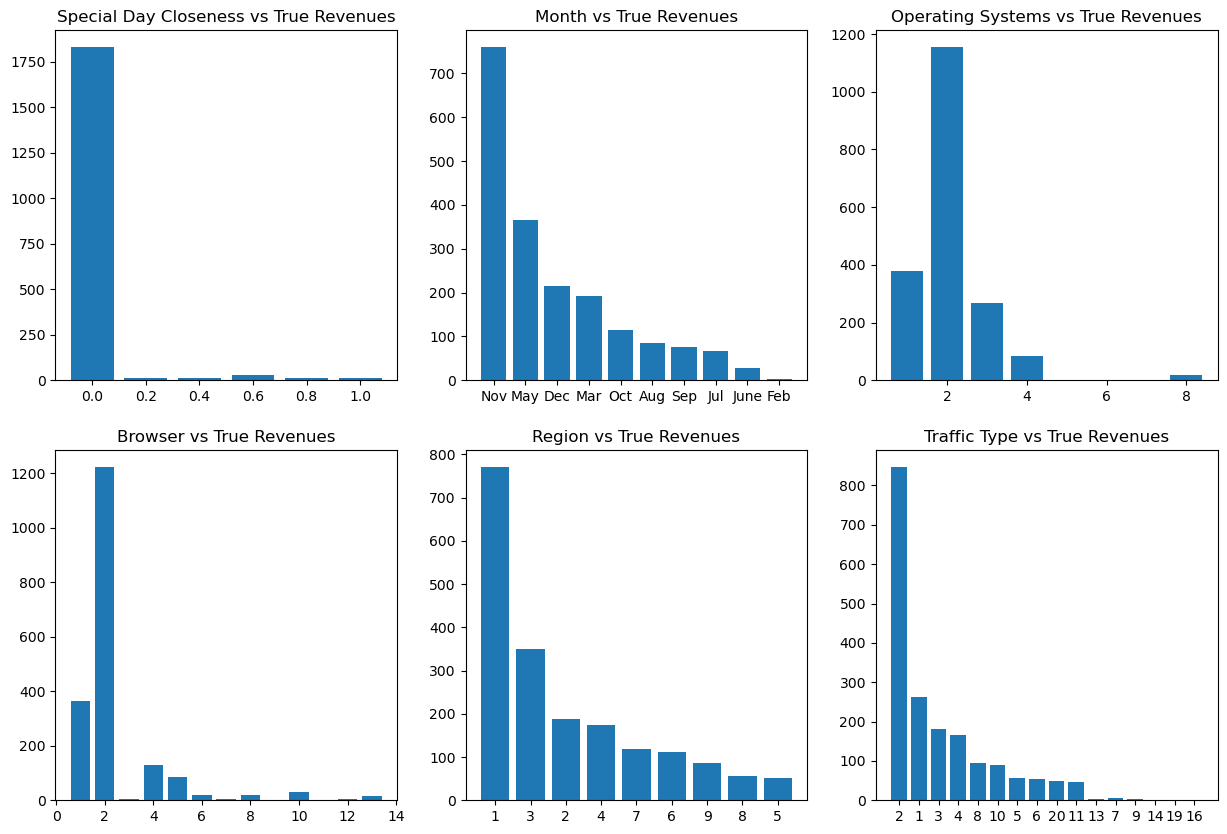

In [118]:
# let us plot all data1 to data6 in one figure
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].bar(data1.index, data1)
axs[0, 0].set_title('Special Day Closeness vs True Revenues')
axs[0, 1].bar(data2.index, data2)
axs[0, 1].set_title('Month vs True Revenues')
axs[0, 2].bar(data3.index, data3)
axs[0, 2].set_title('Operating Systems vs True Revenues')
axs[1, 0].bar(data4.index, data4)
axs[1, 0].set_title('Browser vs True Revenues')
axs[1, 1].bar(data5.index.astype(str), data5)
axs[1, 1].set_title('Region vs True Revenues')
axs[1, 2].bar(data6.index.astype(str), data6)
axs[1, 2].set_title('Traffic Type vs True Revenues')
plt.show()


## VisitorType

In [119]:
df[df['Revenue'] == True]['VisitorType'].value_counts()

Returning_Visitor    1470
New_Visitor           422
Other                  16
Name: VisitorType, dtype: int64

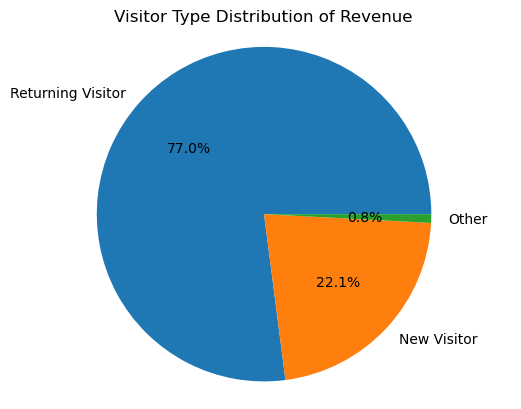

In [120]:
data = pd.Series([1470, 422, 16],
                 index=['Returning Visitor', 'New Visitor', 'Other'])

# Plot the pie chart
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Visitor Type Distribution of Revenue')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

## Weekend

In [121]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [122]:
# let us find how many true revenue when weekend is true
df[df['Revenue'] == True]['Weekend'].value_counts()

False    1409
True      499
Name: Weekend, dtype: int64

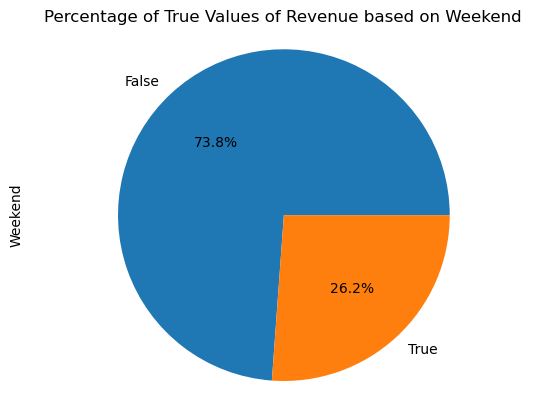

In [123]:
# plotting a pie chart
df[df['Revenue'] == True]['Weekend'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of True Values of Revenue based on Weekend')
plt.axis("equal")
plt.show()

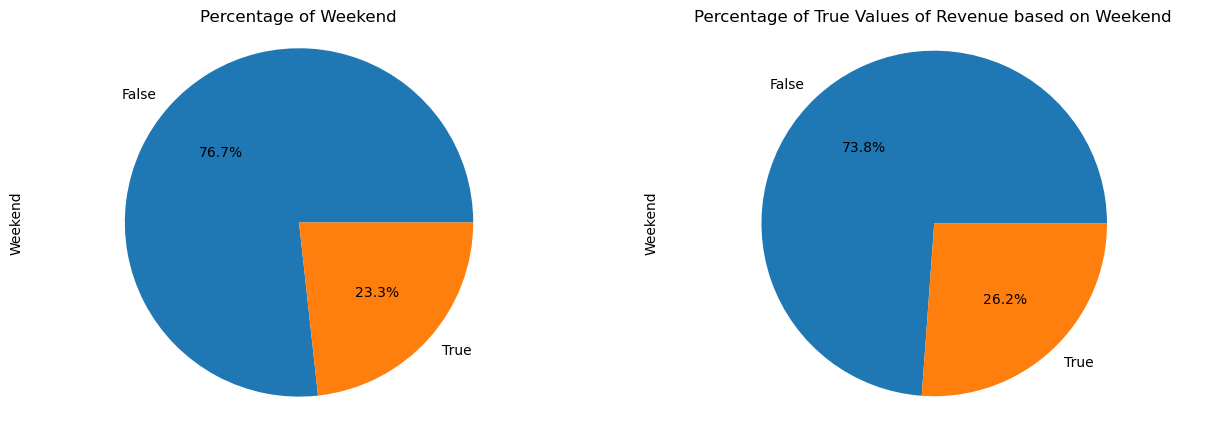

In [124]:
# let us plot the two pie charts together
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
df['Weekend'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[0])
axs[0].set_title('Percentage of Weekend')
axs[0].axis("equal")
df[df['Revenue'] == True]['Weekend'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[1])
axs[1].set_title('Percentage of True Values of Revenue based on Weekend')
axs[1].axis("equal")
plt.show()


## PageValues - Administrative

In [125]:
# is there a relationship between PageValues and Administrative?
encoded_df.groupby('Administrative')['PageValues'].mean()

Administrative
0      3.352355
1      8.701722
2      8.013220
3      6.822536
4      6.964674
5      8.174606
6      8.446823
7      8.559837
8     10.249913
9      8.837289
10     8.565022
Name: PageValues, dtype: float64

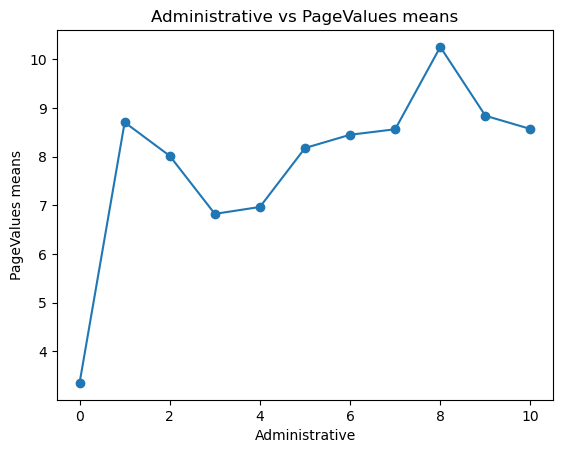

In [126]:
encoded_df.groupby('Administrative')['PageValues'].mean().plot(kind='line', marker='o')
plt.title('Administrative vs PageValues means')
plt.xlabel('Administrative')
plt.ylabel('PageValues means')
plt.show()

# An overall upward trend

## PageValues - ProductRelated

In [127]:
# is there a relationship between PageValues and Administrative?
encoded_df.groupby('ProductRelated')['PageValues'].mean()

ProductRelated
0     0.000000
1     0.170681
2     0.846367
3     1.657080
4     0.793130
        ...   
80    6.990059
81    3.672550
82    8.984561
83    9.186489
84    6.120458
Name: PageValues, Length: 85, dtype: float64

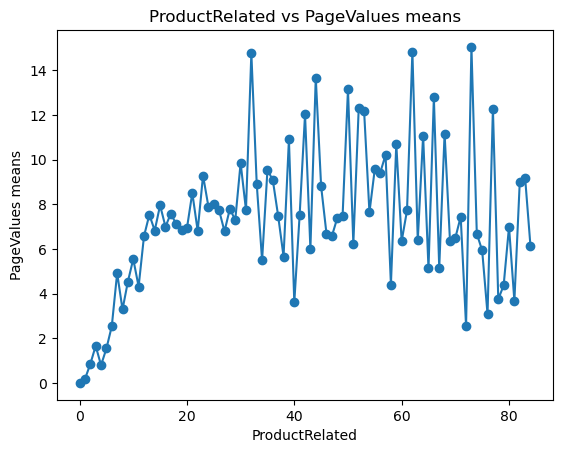

In [128]:
encoded_df.groupby('ProductRelated')['PageValues'].mean().plot(kind='line', marker='o')
plt.title('ProductRelated vs PageValues means')
plt.xlabel('ProductRelated')
plt.ylabel('PageValues means')
plt.show()

# An upward trend till probably 38 and then no trend just fluctuations

## Administrative - Administrative_Duration

In [129]:
# let us find how many true values when Administrative is 0
grouped = encoded_df.groupby('Administrative')['Administrative_Duration'].mean()


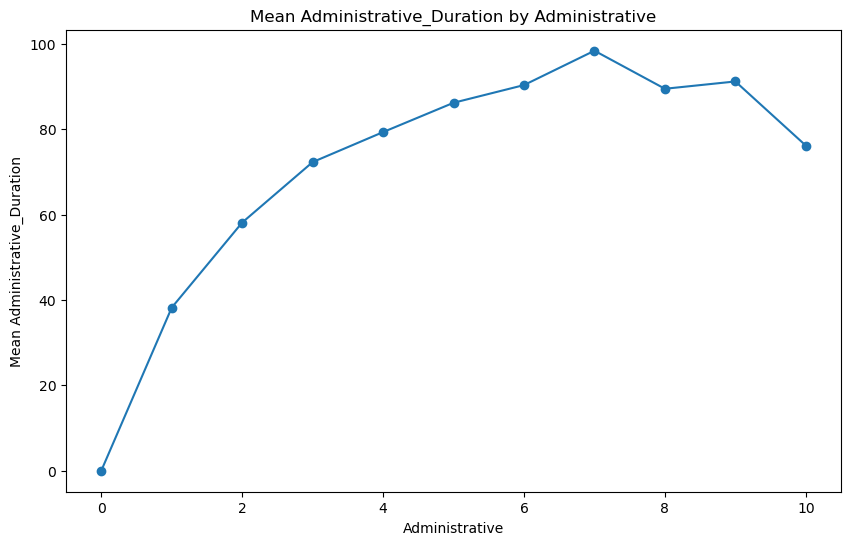

In [130]:
# Create a new figure and set its size
plt.figure(figsize=(10, 6))

# Plot the data
plt.plot(grouped.index, grouped.values, marker='o')

# Set the title and labels
plt.title('Mean Administrative_Duration by Administrative')
plt.xlabel('Administrative')
plt.ylabel('Mean Administrative_Duration')

# Display the plot
plt.show()

In [131]:
counts = encoded_df.loc[encoded_df['Revenue'] == True]['Administrative'].value_counts()

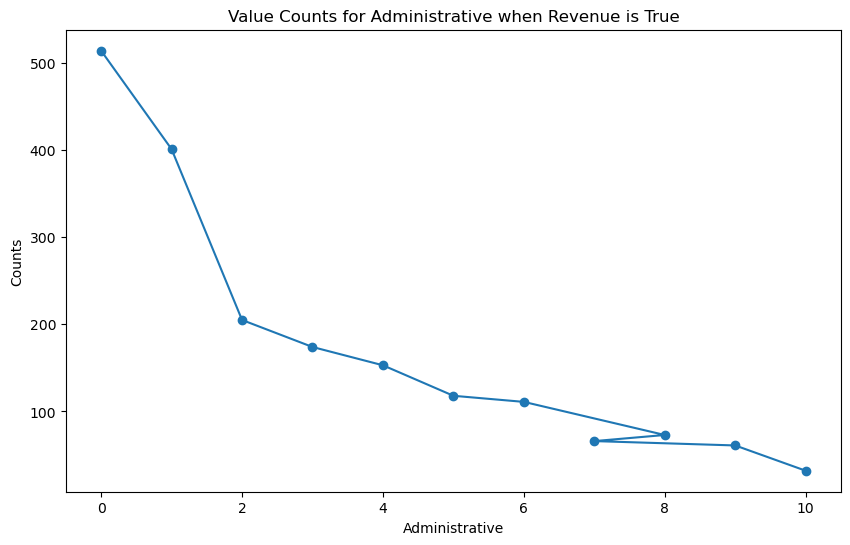

In [132]:
# Create a new figure and set its size
plt.figure(figsize=(10, 6))

# Plot the data
counts.plot(kind='line', marker='o')

# Set the title and labels
plt.title('Value Counts for Administrative when Revenue is True')
plt.xlabel('Administrative')
plt.ylabel('Counts')

# Display the plot
plt.show()



## ProductRelated - ProductRelated_Duration

In [133]:
grouped = encoded_df.groupby('ProductRelated')['ProductRelated_Duration'].mean()

grouped

ProductRelated
0        0.000000
1       16.759474
2       62.648883
3      117.771305
4      163.085785
         ...     
80    1534.842536
81    1764.519437
82    1763.072750
83    1682.403569
84    1712.541655
Name: ProductRelated_Duration, Length: 85, dtype: float64

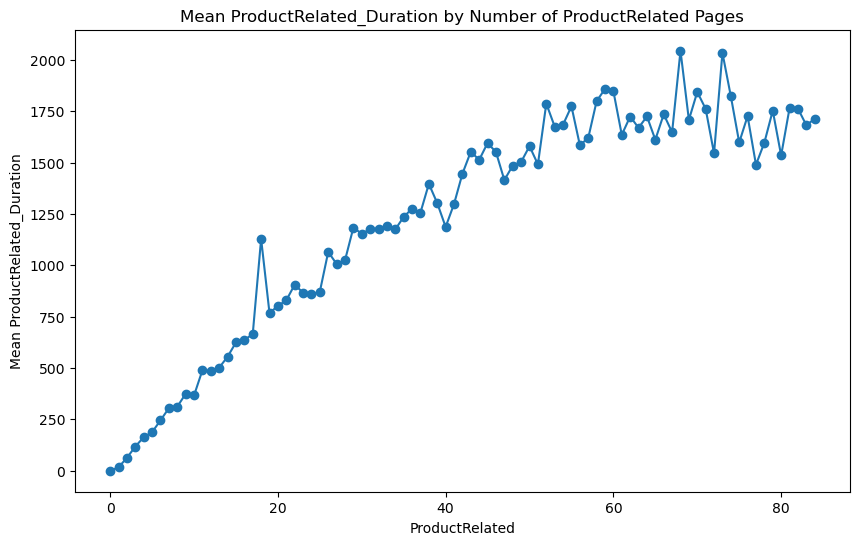

In [134]:
# Create a new figure and set its size
plt.figure(figsize=(10, 6))

# Plot the data
plt.plot(grouped.index, grouped.values, marker='o')

# Set the title and labels
plt.title('Mean ProductRelated_Duration by Number of ProductRelated Pages')
plt.xlabel('ProductRelated')
plt.ylabel('Mean ProductRelated_Duration')

# Display the plot
plt.show()


In [135]:
encoded_df.loc[encoded_df['Revenue'] == True]['ProductRelated'].value_counts()

18    314
10     50
13     45
22     44
14     43
     ... 
65      4
68      4
76      4
72      4
78      1
Name: ProductRelated, Length: 85, dtype: int64

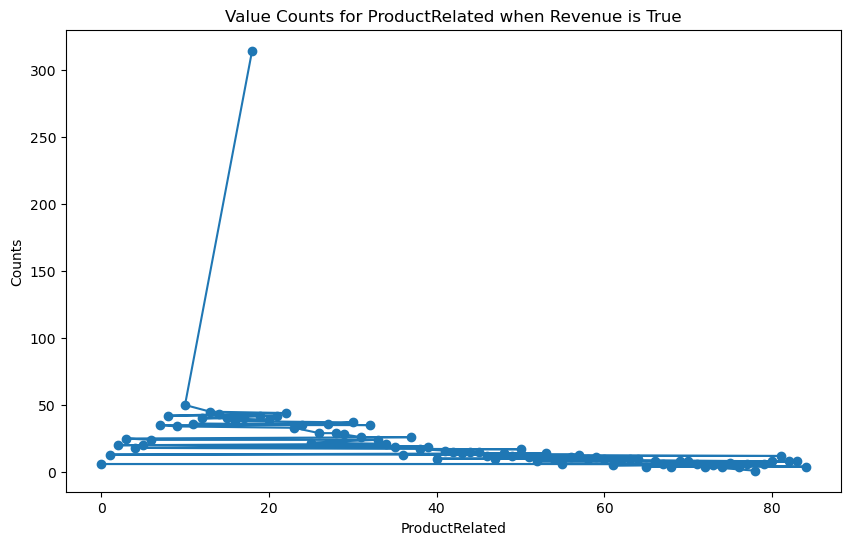

In [136]:
# assuming x_train is your DataFrame and y_train is your target Series
counts = encoded_df.loc[encoded_df['Revenue'] == True]['ProductRelated'].value_counts()

# Create a new figure and set its size
plt.figure(figsize=(10, 6))

# Plot the data
counts.plot(kind='line', marker='o')

# Set the title and labels
plt.title('Value Counts for ProductRelated when Revenue is True')
plt.xlabel('ProductRelated')
plt.ylabel('Counts')

# Display the plot
plt.show()

# There's a slowing decrease in the true values as the number of ProductRelated pages increases.


## VisitorType - Region

In [137]:
# let us groupby the Region and see the distribution of VisitorType of each region
df.groupby('Region')['VisitorType'].value_counts()

Region  VisitorType      
1       Returning_Visitor    4115
        New_Visitor           657
        Other                   8
2       Returning_Visitor     982
        New_Visitor           149
        Other                   5
3       Returning_Visitor    2083
        New_Visitor           312
        Other                   8
4       Returning_Visitor    1038
        New_Visitor           139
        Other                   5
5       Returning_Visitor     268
        New_Visitor            50
6       Returning_Visitor     683
        New_Visitor           121
        Other                   1
7       Returning_Visitor     659
        New_Visitor           100
        Other                   2
8       Returning_Visitor     359
        New_Visitor            74
        Other                   1
9       Returning_Visitor     364
        New_Visitor            92
        Other                  55
Name: VisitorType, dtype: int64

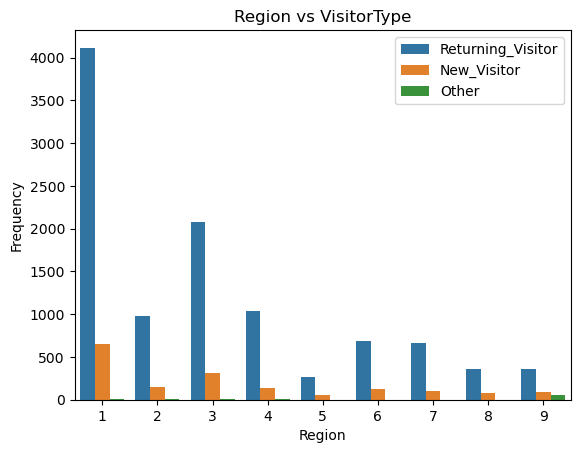

In [138]:
# let us bar plot this
sns.countplot(x='Region', hue='VisitorType', data=df)
plt.legend()
plt.title('Region vs VisitorType')
plt.ylabel('Frequency')
plt.show()

## Visitor Type - PageValues

In [139]:
df.groupby('VisitorType')['PageValues'].mean()

VisitorType
New_Visitor          10.772187
Other                18.191812
Returning_Visitor     5.006176
Name: PageValues, dtype: float64

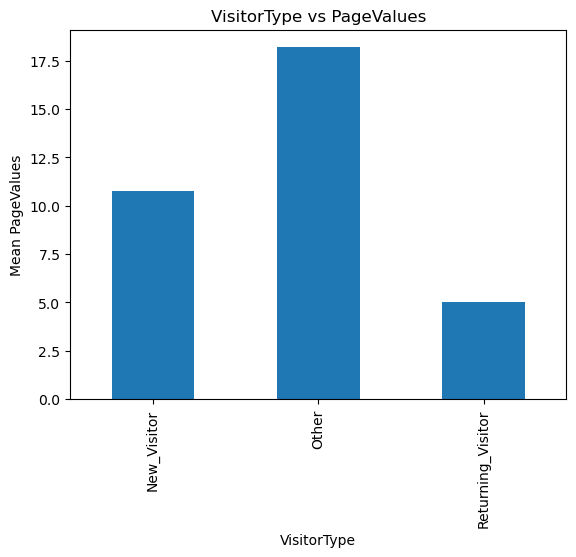

In [140]:
# let us plot a bar graph for the above result
df.groupby('VisitorType')['PageValues'].mean().plot(kind='bar')
plt.title('VisitorType vs PageValues')
plt.ylabel('Mean PageValues')
plt.show()

## VisitorType - ExitRates

In [141]:
df.groupby('VisitorType')['ExitRates'].mean()

VisitorType
New_Visitor          0.020681
Other                0.063349
Returning_Visitor    0.046505
Name: ExitRates, dtype: float64

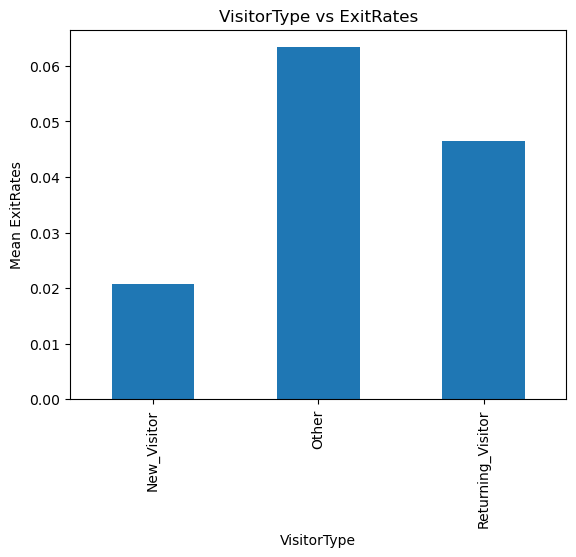

In [142]:
df.groupby('VisitorType')['ExitRates'].mean().plot(kind='bar')
plt.title('VisitorType vs ExitRates')
plt.xlabel('VisitorType')
plt.ylabel('Mean ExitRates')
plt.show()

## VisitorType - BounceRates

In [143]:
df.groupby('VisitorType')['BounceRates'].mean()

VisitorType
New_Visitor          0.005261
Other                0.038551
Returning_Visitor    0.024778
Name: BounceRates, dtype: float64

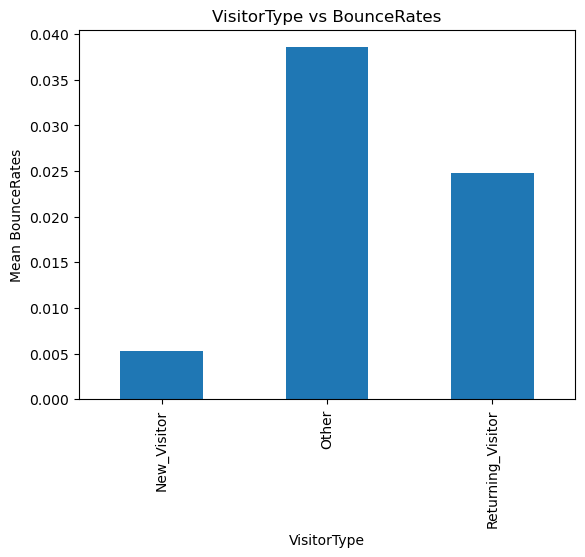

In [144]:
# let us plot a bar graph for the above result
df.groupby('VisitorType')['BounceRates'].mean().plot(kind='bar')
plt.title('VisitorType vs BounceRates')
plt.xlabel('VisitorType')
plt.ylabel('Mean BounceRates')
plt.show()


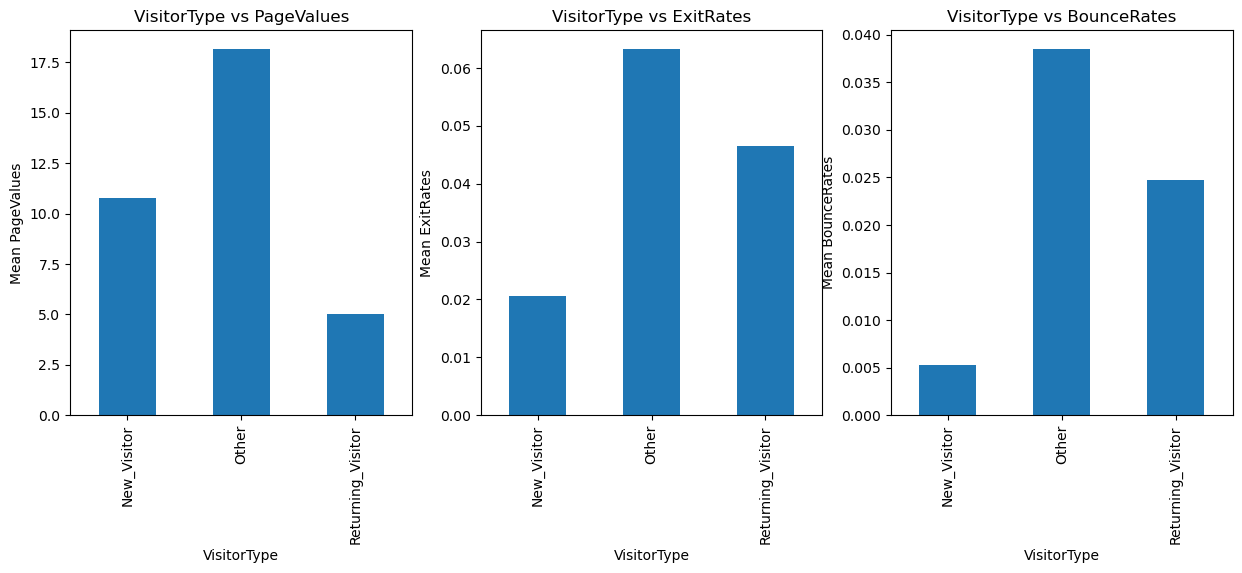

In [145]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
df.groupby('VisitorType')['PageValues'].mean().plot(kind='bar', ax=axs[0])
axs[0].set_title('VisitorType vs PageValues')
axs[0].set_ylabel('Mean PageValues')
df.groupby('VisitorType')['ExitRates'].mean().plot(kind='bar', ax=axs[1])
axs[1].set_title('VisitorType vs ExitRates')
axs[1].set_ylabel('Mean ExitRates')
df.groupby('VisitorType')['BounceRates'].mean().plot(kind='bar', ax=axs[2])
axs[2].set_title('VisitorType vs BounceRates')
axs[2].set_ylabel('Mean BounceRates')
plt.show()

## SpecialDay - ExitRates

In [146]:
encoded_df.groupby('SpecialDay')['ExitRates'].mean()

SpecialDay
0.0    0.041267
0.2    0.053725
0.4    0.060567
0.6    0.061275
0.8    0.061549
1.0    0.052607
Name: ExitRates, dtype: float64

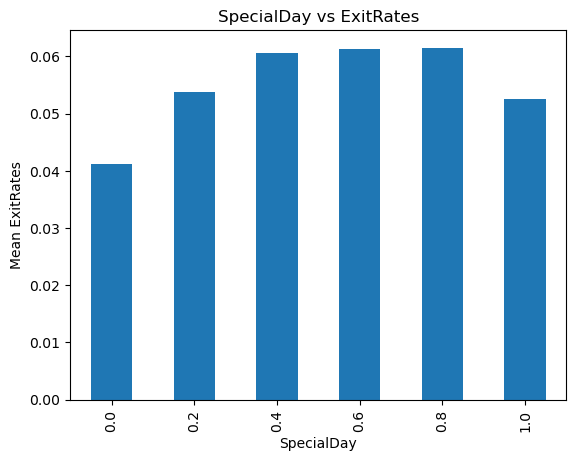

In [147]:
encoded_df.groupby('SpecialDay')['ExitRates'].mean().plot(kind='bar')
plt.title('SpecialDay vs ExitRates')
plt.xlabel('SpecialDay')
plt.ylabel('Mean ExitRates')
plt.show()

## Weekend - ExitRates

In [148]:
df.groupby('Weekend')['ExitRates'].mean()

Weekend
False    0.044747
True     0.037549
Name: ExitRates, dtype: float64

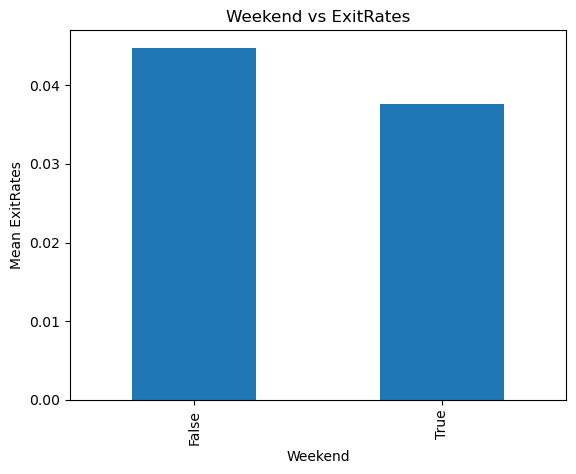

In [149]:
# let us plot a bar graph for the above result
df.groupby('Weekend')['ExitRates'].mean().plot(kind='bar')
plt.title('Weekend vs ExitRates')
plt.ylabel('Mean ExitRates')
plt.show()

## Weekend - BounceRates

In [150]:
df.groupby('Weekend')['BounceRates'].mean()

Weekend
False    0.023433
True     0.018095
Name: BounceRates, dtype: float64

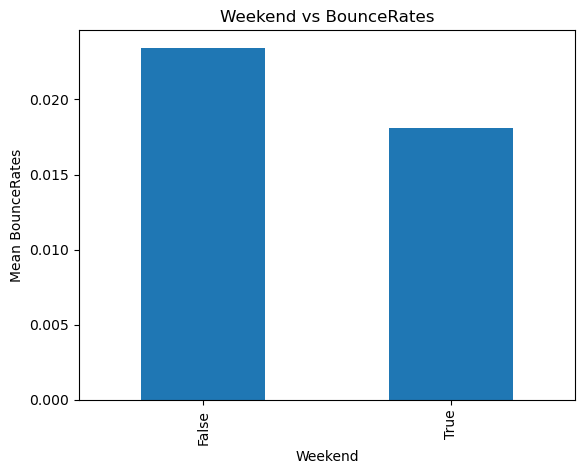

In [151]:
# let us plot a bar graph for the above result
df.groupby('Weekend')['BounceRates'].mean().plot(kind='bar')
plt.title('Weekend vs BounceRates')
plt.ylabel('Mean BounceRates')
plt.show()

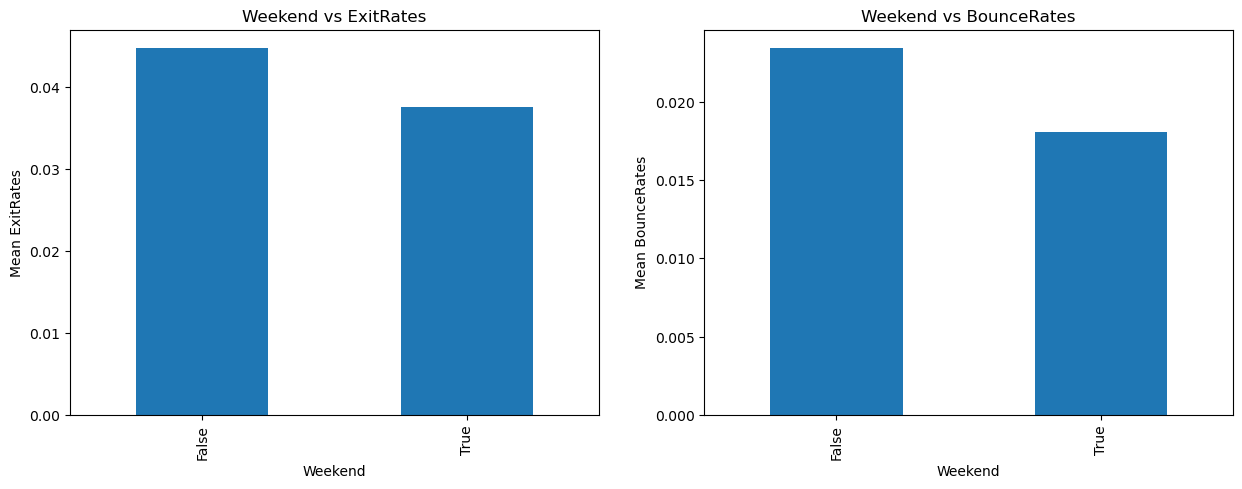

In [152]:
# let us plot weekend vs bounce and exit rates in one figure
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
df.groupby('Weekend')['ExitRates'].mean().plot(kind='bar', ax=axs[0])
axs[0].set_title('Weekend vs ExitRates')
axs[0].set_ylabel('Mean ExitRates')
df.groupby('Weekend')['BounceRates'].mean().plot(kind='bar', ax=axs[1])
axs[1].set_title('Weekend vs BounceRates')
axs[1].set_ylabel('Mean BounceRates')
plt.show()


# Feature Selection

In [153]:
encoded_df.drop(['Informational','Informational_Duration'], axis=1, inplace=True)

In [154]:
y = encoded_df['Revenue']
encoded_df.drop(['Revenue'], axis=1, inplace=True)
# let us remove column names
array = encoded_df.values

array.shape[1]

27

In [155]:
col_num = array.shape[1]

new_Ind = []
cur_MaxScore = 0.0
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = array[:, new_Ind].copy()
    X_train, X_test, y_train1, y_test = train_test_split(newData, y, test_size=0.25, random_state=0)
    clf = KNeighborsClassifier(5)
    fit = clf.fit(X_train, y_train1)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

Score with 1 selected features: 0.8300356795329225


/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

Score with 2 selected features: 0.8300356795329225


/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

Score with 3 selected features: 0.8300356795329225
Score with 4 selected features: 0.8300356795329225


/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

Score with 5 selected features: 0.8300356795329225


/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

Score with 6 selected features: 0.8728511190398962


/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

Score with 7 selected features: 0.8731754784301006
Score with 8 selected features: 0.8747972753811223


/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

Score with 9 selected features: 0.8783652286733701
Score with 10 selected features: 0.8796626662341874


/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

Score with 11 selected features: 0.8812844631852093
Score with 12 selected features: 0.882906260136231


/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

Score with 13 selected features: 0.882906260136231


/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

In [156]:
print(new_Ind)

[17, 18, 23, 10, 21, 6, 7, 24, 0, 15, 26, 25, 8]


In [157]:
encoded_df.columns[new_Ind]

Index(['Month_Mar', 'Month_May', 'VisitorType_Other', 'Region', 'Month_Sep',
       'PageValues', 'SpecialDay', 'VisitorType_Returning_Visitor',
       'Administrative', 'Month_Jul', 'Weekend_True', 'Weekend_False',
       'OperatingSystems'],
      dtype='object')

# Feature Engineering

In [158]:
# encoded_df.loc[(encoded_df['BounceRates'] == 0) & (encoded_df['PageValues'] > 0)]['Revenue'].value_counts()

# # there are 1908 true values. 872 are because bounce rate == 0 and page values > 0

# # let us create a column where that column will have 1 if the bounce rate is 0 and page values > 0 and 0 otherwise
# encoded_df['BounceRate_PageValues'] = encoded_df.apply(lambda x: 1 if (x['BounceRates'] == 0) & (x['PageValues'] > 0) else 0, axis=1)

# Models

## KNN

In [159]:
# creating list of K for KNN
k_list = list(range(1, 50, 2))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, encoded_df, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is {}".format(optimal_k))

/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

The optimal number of neighbors is 13


/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [160]:
# let us determine what's the best p value

# creating list of p for KNN
p_list = list(range(1, 10, 1))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for p in p_list:
    knn = KNeighborsClassifier(n_neighbors=optimal_k, p=p)
    scores = cross_val_score(knn, encoded_df, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_p = p_list[MSE.index(min(MSE))]
print("The optimal number of p is {}".format(optimal_p))


/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

The optimal number of p is 9


/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [161]:
# let us decide the weights
# creating list of K for KNN
weight_options = ['uniform', 'distance']

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for weight in weight_options:
    knn = KNeighborsClassifier(n_neighbors=optimal_k, p=optimal_p, weights=weight)
    scores = cross_val_score(knn, encoded_df, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_weight = weight_options[MSE.index(min(MSE))]
optimal_weight

/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

'uniform'

In [162]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df, y, random_state = 0)
clf_13 = KNeighborsClassifier(n_neighbors=optimal_k, p=optimal_p, weights=optimal_weight)
fit = clf_13.fit(X_train, y_train)
predicted = clf_13.predict(X_test)
cm = confusion_matrix(y_test, predicted)

print('Confusion Matrix:')
print(cm)
print('------------------------------')
print('Model Score:')
print(clf_13.score(X_test, y_test))
print('------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion Matrix:
[[2510   49]
 [ 364  160]]
------------------------------
Model Score:
0.866039571845605
------------------------------
Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.98      0.92      2559
        True       0.77      0.31      0.44       524

    accuracy                           0.87      3083
   macro avg       0.82      0.64      0.68      3083
weighted avg       0.86      0.87      0.84      3083



/Users/marwan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## DecisionTree

In [163]:
# let us try to find the best max_depth

max_depth_list = list(range(1, 10, 1))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for max_depth in max_depth_list:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(clf, encoded_df, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best max_depth
optimal_max_depth = max_depth_list[MSE.index(min(MSE))]
print("The optimal number of max depth is {}".format(optimal_max_depth))


The optimal number of max depth is 3


In [164]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=optimal_max_depth)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [165]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

m = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:')
print(cm)
print('------------------------------')
print('Model Score:')
print(clf.score(X_test, y_test))
print('------------------------------')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[2510   49]
 [ 364  160]]
------------------------------
Model Score:
0.8864742134284788
------------------------------
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.95      0.93      2559
        True       0.70      0.58      0.64       524

    accuracy                           0.89      3083
   macro avg       0.81      0.77      0.78      3083
weighted avg       0.88      0.89      0.88      3083



In [166]:
export_graphviz(clf, 'm.dot', feature_names = encoded_df.columns)